In [1]:
%pwd

'C:\\Users\\alonb\\OneDrive\\Documents\\PJO\\Assets\\Operational-Ontologies'

In [2]:
%pwd
%cd Operational-Ontologies

[WinError 2] The system cannot find the file specified: 'Operational-Ontologies'
C:\Users\alonb\OneDrive\Documents\PJO\Assets\Operational-Ontologies


In [4]:
from PJO1 import *

In [11]:

import networkx as nx
import matplotlib.pyplot as plt


# get the classes (types) of the individual
get_class  = lambda x: [(x.name,'rdf:type',cls.name) for cls in x.is_a]


  
# get properties for a given individual it return a tuple of a triplet.
get_properties = lambda x: [(x.name, prop.name, getattr(x, prop.name)) for prop in x.get_properties()]



def get_properties(individual):
    '''
    A method to return triplets of the form (subject, predicate, object) for the classes of the individual
    '''
    triples = []
    for prop in individual.get_properties():
        value = getattr(individual, prop.name)
        if isinstance(value, list):
            for v in value:
                triples.append((individual.name, prop.name, v.name if hasattr(v, 'name') else v))
        else:
            triples.append((individual.name, prop.name, value.name if hasattr(value, 'name') else value))   
    return triples


def get_triples(individual):
    return get_class(individual) + get_properties(individual)

# Example RDF triples

def draw_k_graph(triples):
    '''
    A method to draw a knowledge graph from a list of triples representing the encounter the patient had
    '''
    plt.figure(figsize=(10, 8))
    G = nx.DiGraph()
    for s, p, o in triples:
        G.add_edge(s, o, label=p)

    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=6)

    # Draw edge labels (properties)
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    plt.show()
    #plt.savefig("knowledge_graph.png")  # Save the graph as a PNG file






In [12]:
#hoo.destroy()

In [13]:

### Scenario Scheduling
def destroy():
    destroy_entity(patient1)
    destroy_entity(schedule)
    destroy_entity(call_center)
    destroy_entity(encounter)
    hoo.save
#


patient1 = Patient("patient1")
patient1.hasAge = 45  # Assigning an age to the patient
patient1.hasName = "John Adams" # Assigning a name to the patient
patient1.hasId = "A12345" # Assigning an ID to the patient
#
encounter = Encounter("encounter1")

# You can set properties defined for Encounter
encounter.hasTimestamp = "2025-10-20 10:00:00"
encounter.encounterHasId = '1aq23'
#encounter.hasModality = [modality_instance]  # if you have a modality instance
encounter.hasPurpose = "Scheduling"
#
#encounter = InteractionType('encntr')
#encounter.encounterHasId = '1A32'
#encounter.hasPurpose = 'Scheduleing'
#encounter.hasModalityType = "call center"

# Scheduling Interaction
schedule = InteractionType('schedule')
schedule.hasPurpose = "Scheduling"
schedule.hasTimestamp = "2025-09-09 12:00:00"
patient1.hasPatientInteraction = schedule




call_center = ModalityType('Call_Center')
call_center.modalityAppliedToPatient.append(patient1)


scheduling_encounter = Encounter('scheduling_encounter')



In [14]:
pwd


'C:\\Users\\alonb\\OneDrive\\Documents\\PJO\\Assets\\Operational-Ontologies'

[('patient1', 'rdf:type', 'Patient'), ('patient1', 'hasId', 'A12345'), ('patient1', 'hasPatientInteraction', 'schedule'), ('patient1', 'hasName', 'John Adams'), ('patient1', 'hasAge', 45), ('patient1', 'usesModality', 'Call_Center'), ('encounter1', 'rdf:type', 'Encounter'), ('encounter1', 'hasTimestamp', '2025-10-20 10:00:00'), ('encounter1', 'encounterHasId', '1aq23'), ('encounter1', 'hasPurpose', 'Scheduling'), ('schedule', 'rdf:type', 'InteractionType'), ('schedule', 'hasTimestamp', '2025-09-09 12:00:00'), ('schedule', 'hasPurpose', 'Scheduling'), ('Call_Center', 'rdf:type', 'ModalityType'), ('Call_Center', 'modalityAppliedToPatient', 'patient1'), ('Call_Center', 'modalityAppliedToPatient', 'patient1')]


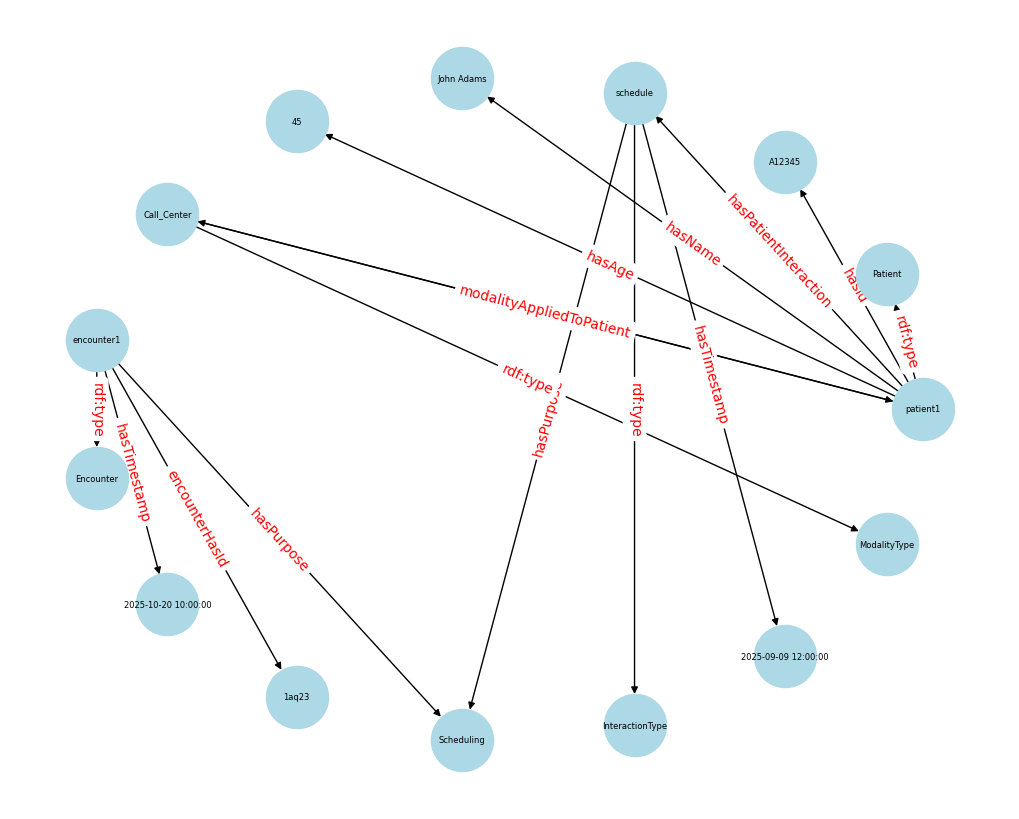

In [15]:
tr = get_triples(patient1) + get_triples(encounter) + get_triples(schedule) + get_triples(call_center)
print(tr)
draw_k_graph(tr)

In [16]:
### Scenario : Surgery
patient1 = Patient("patient1")
patient1.hasAge = 45  # Assigning an age to the patient
patient1.hasName = "John Adams" # Assigning a name to the patient
patient1.hasId = "A12345" # Assigning an ID to the patient
# Define a procedure and link it to the patient
rpp = Procedure("rpp")
#patient1.hasUndergoneProcedure.append(rpp)
#
rpp.procedurePerformedOn.append(patient1)
# Define an interaction type and link it to the patient
f2f = InteractionType("f2f")

patient1.hasPatientInteraction = f2f
rpp.hasTimestamp = "2023-10-01T10:00:00"
patient1.hasProcedureDoneDatetime = rpp.hasTimestamp


In [17]:
triples1 = get_triples(patient1)
# get the relationship for patient1
print(triples1)

[('patient1', 'rdf:type', 'Patient'), ('patient1', 'hasId', 'A12345'), ('patient1', 'hasPatientInteraction', 'f2f'), ('patient1', 'hasName', 'John Adams'), ('patient1', 'hasAge', 45), ('patient1', 'hasProcedureDoneDatetime', '2023-10-01T10:00:00'), ('patient1', 'hasUndergoneProcedure', 'rpp'), ('patient1', 'usesModality', 'Call_Center')]


In [18]:
triples2 = get_triples(rpp)
# the relationship for  the procedure

In [19]:
triples = triples1 + triples2

In [20]:
triples

[('patient1', 'rdf:type', 'Patient'),
 ('patient1', 'hasId', 'A12345'),
 ('patient1', 'hasPatientInteraction', 'f2f'),
 ('patient1', 'hasName', 'John Adams'),
 ('patient1', 'hasAge', 45),
 ('patient1', 'hasProcedureDoneDatetime', '2023-10-01T10:00:00'),
 ('patient1', 'hasUndergoneProcedure', 'rpp'),
 ('patient1', 'usesModality', 'Call_Center'),
 ('rpp', 'rdf:type', 'Procedure'),
 ('rpp', 'hasTimestamp', '2023-10-01T10:00:00'),
 ('rpp', 'procedurePerformedOn', 'patient1')]

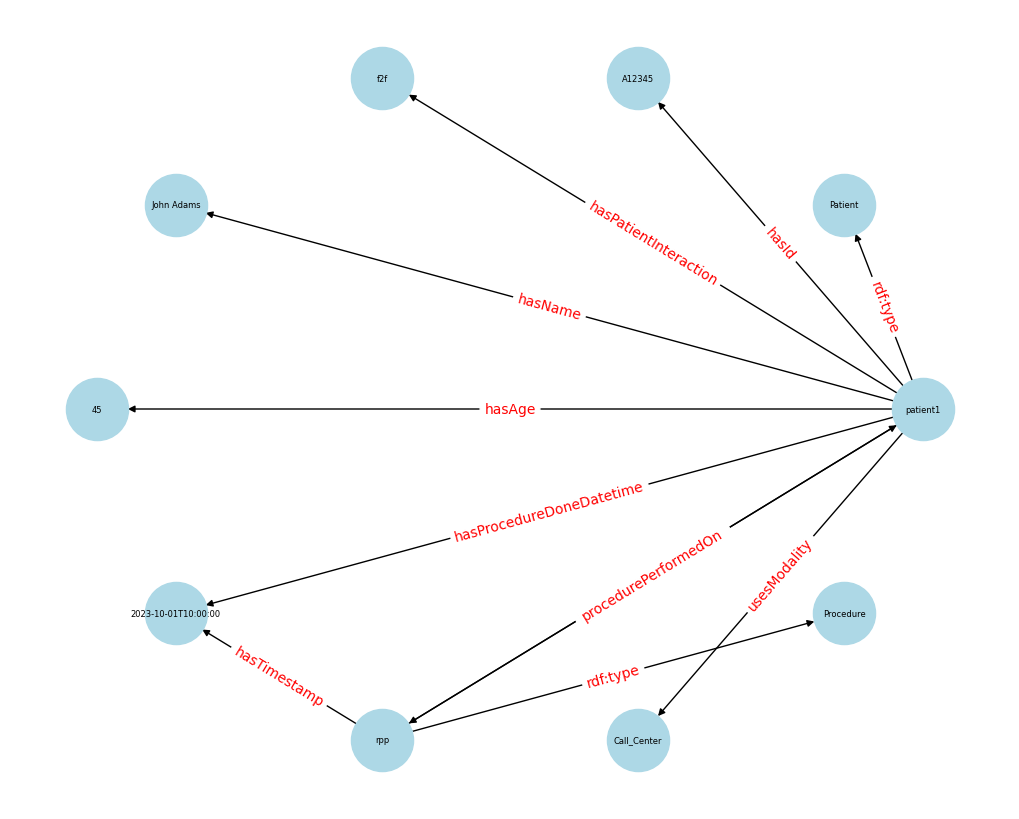

In [21]:
draw_k_graph(triples)

In [34]:
## payment time.
payment = InteractionType('payment')
payment.hasPurpose = "Payment"
payment.hasTimestamp = "2025-09-10 15:30:00"
patient1.hasPatientInteraction = payment

financial = financial_event()
stable_coin = paymentModality()
financial.hasCryptoPayment = [stable_coin]
stable_coin.hasPaymentAmount = 150.00
stable_coin.hasPaymentCurrency = "USDC"

In [41]:
dir(stable_coin)

['INDIRECT_get_properties',
 '__class__',
 '__classcell__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_equivalent_to',
 '_get_instance_possible_relations',
 '_get_is_instance_of',
 '_instance_equivalent_to_changed',
 '_instance_is_a_changed',
 '_name',
 '_set_is_instance_of',
 'differents',
 'entity_class',
 'generate_default_name',
 'get_equivalent_to',
 'get_inverse_properties',
 'get_iri',
 'get_name',
 'get_properties',
 'hasPaymentAmount',
 'hasPaymentCurrency',
 'iri',
 'is_a',
 'is_instance_of',
 'name',
 'namespace',
 'reload',
 'set_equivalent_to',
 'set_iri',
 'set_name',
 'storid']

In [39]:
pay_trip = get_triples(payment)+get_triples(financial)+get_triples(stable_coin)

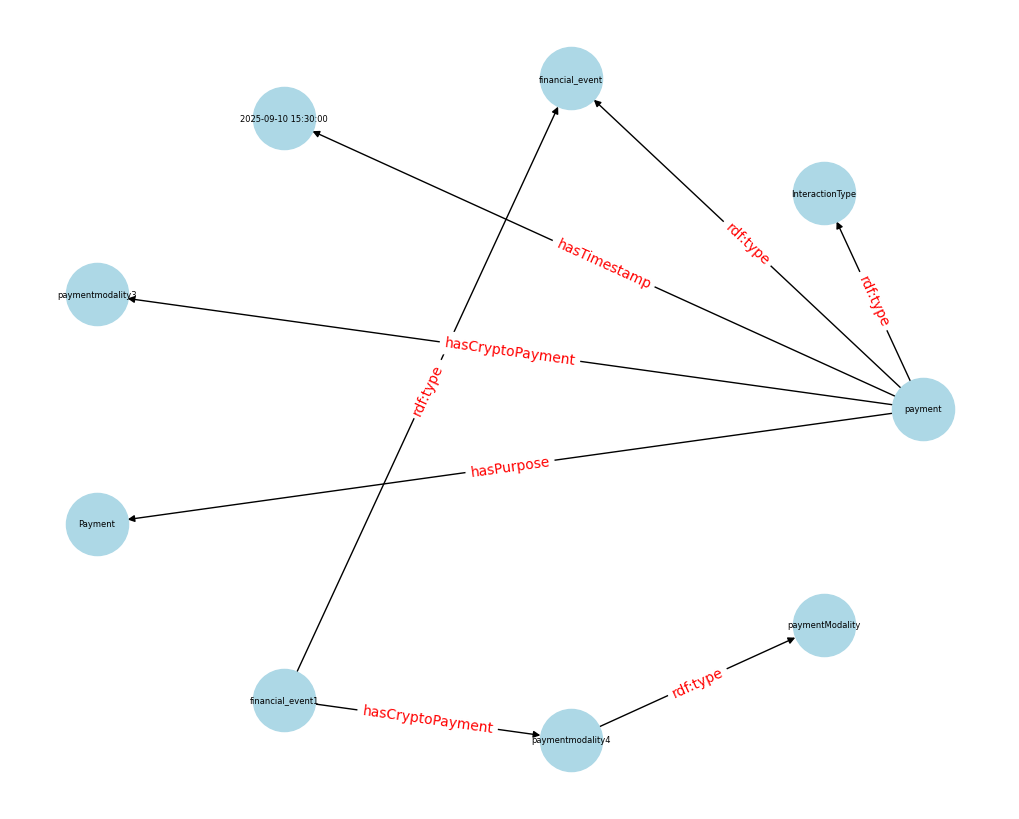

In [40]:
draw_k_graph(pay_trip)

4051


KeyError: 'LP32525-5'

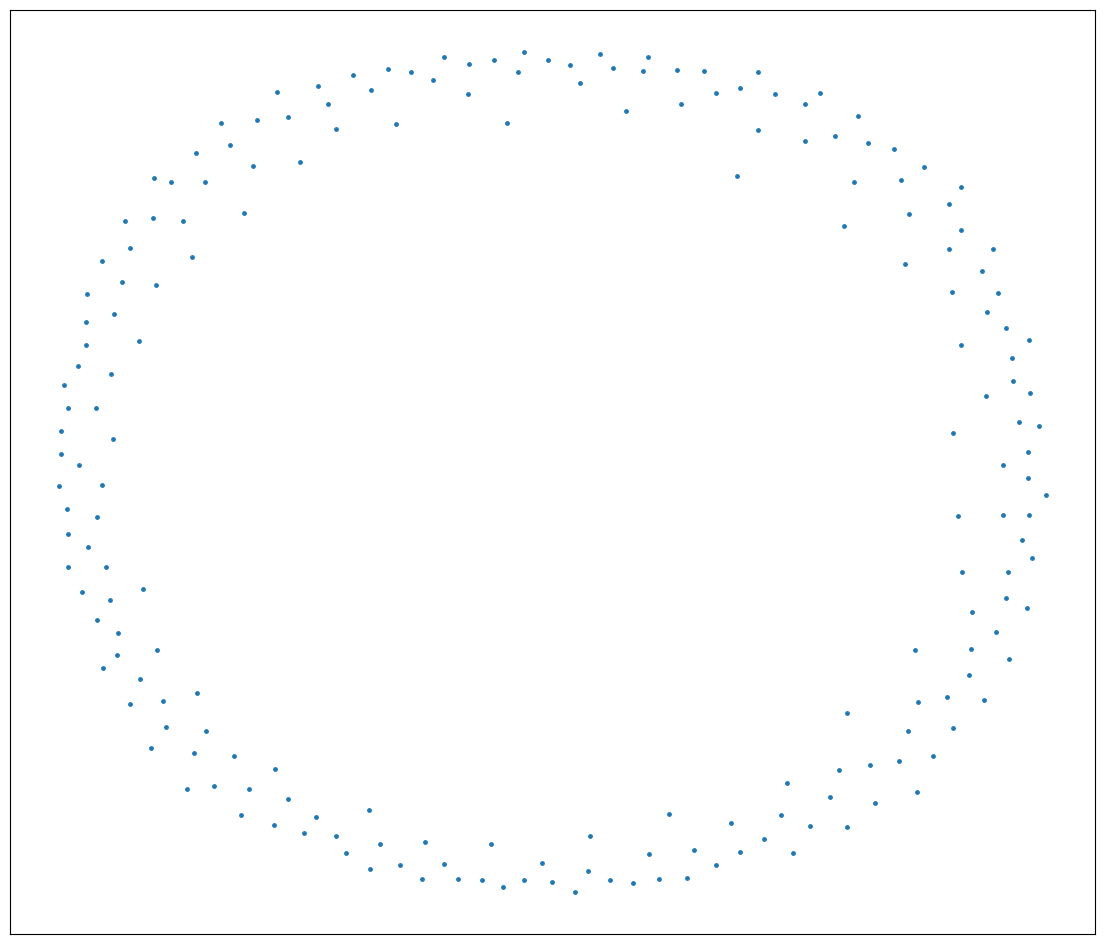

In [40]:

from owlready2 import get_ontology, onto_path
do_ontology = get_ontology(".\\Operational-Ontologies\\Assets\\DocumentOntologyRDF.owl").load() 

import matplotlib.pyplot as plt
import networkx as nx

a = [cls   for cls in do_ontology.classes()] # get all classes
es = [(c.name, c.is_a[0].name) for c in a] # get all edges
labels = {str(cls.name):str(cls.label[0]) for cls in a}
print(len(labels))
# add labels to nodes
fig, ax = plt.subplots(1,1, figsize = (14,12))
G = nx.DiGraph()
G.add_nodes_from(es[:200])
pos = pos = nx.spring_layout(G)

nx.draw(G,pos, font_size = 6, node_size = 6, labels = labels)


In [42]:
s = [k for k in labels.keys() if type(k) = 'str']
print(len(s))

SyntaxError: invalid syntax (3836771619.py, line 1)

In [7]:
plt.figure(figsize=(10, 6))


AttributeError: module 'matplotlib' has no attribute 'figure'